In [1]:
import polars as pl

from src.data_transformation import stock_split_adj
from src.data_transformation import technical_indicators
from src.data_transformation import cboe_index_join

print(pl.__version__)

1.22.0


In [2]:
# Import ohlcv data as polar dataframe
ohlcv = pl.read_csv("data/raw/stocks/csv/ohlcv.csv")

# Adjust date column format
ohlcv = ohlcv.with_columns(
    pl.col("date").str.to_date("%Y-%m-%d")
)

In [3]:
# Apply stock split adjustment (~5 seconds)
ohlcv = stock_split_adj.adjust_splits(ohlcv)

c:\Users\dkgam\OneDrive\Documents\ds401-project\src\data_transformation\stock_split_adj.py:47: UserWarning: left key of asof join is not sorted.

This can lead to invalid results. Ensure the asof key is sorted
  .join_asof(
c:\Users\dkgam\OneDrive\Documents\ds401-project\src\data_transformation\stock_split_adj.py:47: UserWarning: right key of asof join is not sorted.

This can lead to invalid results. Ensure the asof key is sorted
  .join_asof(


In [4]:
# Apply technical indicators (~1.5 minutes)
ohlcv = (
    ohlcv.lazy()
    .pipe(technical_indicators.add_technical_indicators)
    .collect()
)

In [5]:
# Join with CBOE index data (~2 seconds)
ohlcv = cboe_index_join.join_cboe_indices(ohlcv)

In [6]:
# Verify columns appended properly
ohlcv.head(10)

date,act_symbol,open,high,low,close,volume,log_returns,log_returns_sq,log_returns_lag1,log_returns_lag1_sq,SMA_3,EMA_3,SMA_5,EMA_5,SMA_10,EMA_10,SMA_20,EMA_20,SMA_50,EMA_50,RSI_7,RSI_9,RSI_14,RSI_21,RSI_30,macd_line,signal_line,macd_histogram,BB_Middle_20,BB_Upper_20,BB_Lower_20,BB_Middle_50,BB_Upper_50,BB_Lower_50,CMF_10,CMF_20,CMF_50,CMF_100,Stochastic_%K_9,Stochastic_%D_9,Stochastic_%K_14,Stochastic_%D_14,Stochastic_%K_21,Stochastic_%D_21,Tenkan_Sen,Kijun_Sen,Senkou_Span_B,Senkou_Span_A,Chikou_Span,gvz,ovx,vix9d,vix,vvix,vxapl,vxazn,vxeem
date,str,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2011-03-16,"""A""",43.59,43.76,41.86,42.33,5047853,-0.034594,0.001197,-0.02301,0.000529,43.663333,43.392656,44.242,43.885591,44.867,44.102151,43.5375,43.8285,43.0298,43.203987,13.278008,47.455867,54.024557,44.469424,50.473293,0.397414,0.483018,-0.085604,43.5375,47.360058,39.714942,43.0298,46.087505,39.972095,0.654452,0.602278,0.549884,null,9.494949,38.399883,30.542636,52.256399,34.788937,54.196992,44.335,43.375,null,null,49.34,18.74,42.82,31.04,29.4,112.39,42.62,41.28,32.86
2011-03-16,"""AACG""",7.72,8.25,7.69,8.1,158804,0.051943,0.002698,-0.010349,0.000107,7.853333,7.922915,7.842,7.862136,7.788,7.637845,6.8825,6.975603,5.174,5.708593,69.902913,57.971014,81.707317,85.714286,82.286634,0.885107,0.895408,-0.010301,6.8825,9.742127,4.022873,5.174,8.517721,1.830279,0.645232,0.621526,NaN,null,80.0,52.655367,81.099656,77.387829,88.017429,82.643428,7.875,6.35,null,null,7.06,18.74,42.82,31.04,29.4,112.39,42.62,41.28,32.86
2011-03-16,"""AADR""",29.28,29.29,28.55,28.68,31528,-0.030222,0.000913,-0.006071,0.000037,29.326667,29.218082,29.598,29.505255,30.134,29.856888,30.219,30.06688,null,30.128919,1.310044,12.927757,32.702703,34.740883,41.076923,-0.176355,-0.001758,-0.174597,30.219,31.237087,29.200913,null,null,null,NaN,NaN,null,null,5.508475,10.845167,5.508475,10.845167,5.508475,10.845167,29.73,29.73,null,null,31.76,18.74,42.82,31.04,29.4,112.39,42.62,41.28,32.86
2011-03-16,"""AAIC""",27.57,27.88,27.01,27.31,54624,-0.011649,0.000136,-0.00253,0.000006,27.546667,27.546628,27.836,27.625911,27.571,27.597352,27.632,27.321262,25.9844,26.43032,64.160839,47.354839,48.334919,53.543307,56.088083,0.443395,0.531471,-0.088076,27.632,29.019699,26.244301,25.9844,29.096111,22.872689,0.45428,0.448871,0.50003,null,57.185629,64.271457,57.185629,64.271457,54.727794,61.509074,27.07,27.145,null,null,29.94,18.74,42.82,31.04,29.4,112.39,42.62,41.28,32.86
2011-03-16,"""AAME""",2.06,2.07,2.05,2.05,2099,-0.024098,0.000581,-0.004751,0.000023,2.086667,2.072688,2.076,2.074026,2.074,2.072884,2.075,2.080778,null,2.090357,42.857143,45.0,49.090909,46.268657,42.718447,-0.011307,-0.014066,0.002759,2.075,2.164089,1.985911,null,null,null,NaN,NaN,null,null,65.0,79.202899,56.521739,72.463768,52.0,58.444444,2.02,2.085,null,null,2.06,18.74,42.82,31.04,29.4,112.39,42.62,41.28,32.86
2011-03-16,"""AAON""",12.69,13.02,12.59,12.82,100492,0.012559,0.000158,-0.009434,0.000089,12.753333,12.807348,12.83,12.899065,13.196,13.075547,13.3795,13.120129,12.6988,12.940082,37.837838,33.333333,38.132296,48.11828,54.580897,0.027476,0.165087,-0.137611,13.3795,14.097259,12.661741,12.6988,14.014331,11.383269,0.385644,0.448325,0.546764,null,23.870968,19.052066,23.717949,18.92911,23.717949,22.821468,13.225,12.99,null,null,14.67,18.74,42.82,31.04,29.4,112.39,42.62,41.28,32.86
2011-03-16,"""AAP""",65.16,65.51,64.56,64.93,1199813,-0.007518,0.000057,0.002142,0.000005,65.21,65.111517,65.224,65.015028,64.601,64.591515,63.5015,64.112114,63.4326,63.961437,76.857143,54.786151,72.147239,54.224835,53.581142,0.457747,0.19525,0.262497,63.5015,66.390195,60.612805,63.4326,66.031017,60.834183,0.591104,0.530401,0.497581,null,69.91404,78.774778,77.61194,84.961477,81.349911,86.323268,64.235,63.675,null,null,66.42,18.74,42.82,31.04,29.4,112.39,42.62,41.28,32

## Apple Example
Here, we are filtering our data so we are only looking at AAPL data from 2020.  
We will construct some simple plots.

In [7]:
aapl = ohlcv.filter(pl.col("act_symbol") == "AAPL").sort("date")

aapl = aapl.filter(pl.col("date") >= pl.date(2020, 1, 1)).filter(pl.col("date") < pl.date(2021, 1, 1))

aapl.tail(10)

date,act_symbol,open,high,low,close,volume,log_returns,log_returns_sq,log_returns_lag1,log_returns_lag1_sq,SMA_3,EMA_3,SMA_5,EMA_5,SMA_10,EMA_10,SMA_20,EMA_20,SMA_50,EMA_50,RSI_7,RSI_9,RSI_14,RSI_21,RSI_30,macd_line,signal_line,macd_histogram,BB_Middle_20,BB_Upper_20,BB_Lower_20,BB_Middle_50,BB_Upper_50,BB_Lower_50,CMF_10,CMF_20,CMF_50,CMF_100,Stochastic_%K_9,Stochastic_%D_9,Stochastic_%K_14,Stochastic_%D_14,Stochastic_%K_21,Stochastic_%D_21,Tenkan_Sen,Kijun_Sen,Senkou_Span_B,Senkou_Span_A,Chikou_Span,gvz,ovx,vix9d,vix,vvix,vxapl,vxazn,vxeem
date,str,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020-12-17,"""AAPL""",128.9,129.58,128.05,128.7,94359811,0.006939,0.000048,-0.000548,2.9980e-7,128.13,127.567454,125.716,126.507092,124.398,124.75512,121.4695,122.566238,118.7156,119.139217,67.170111,71.923861,77.485247,64.763717,65.459861,2.549454,1.926327,0.623126,121.4695,129.935411,113.003589,118.7156,127.63532,109.79588,0.61349,0.571274,0.515646,0.531962,90.668081,94.532455,93.108849,96.114229,94.820483,97.047018,124.865,121.085,120.54,115.505,142.06,20.1,36.86,18.62,21.93,110.21,38.62,35.55,22.31
2020-12-18,"""AAPL""",128.96,129.1,126.12,126.66,192541496,-0.015978,0.000255,0.006939,0.000048,127.723333,127.113727,126.566,126.558062,124.839,125.101462,121.8705,122.95612,118.9494,119.43415,70.299501,59.540984,67.607589,63.396461,58.99128,2.555308,2.052123,0.503185,121.8705,130.529654,113.211346,118.9494,128.078756,109.820044,0.541002,0.52603,0.508895,0.525375,69.034995,84.296808,69.487983,85.995926,82.81342,91.361702,124.865,121.085,120.54,115.505,137.09,19.58,37.15,16.7,21.57,110.3,41.09,36.15,21.09
2020-12-21,"""AAPL""",125.02,128.31,123.45,128.23,121251553,0.012319,0.000152,-0.015978,0.000255,127.863333,127.671863,127.856,127.115374,125.287,125.670287,122.415,123.458394,119.1746,119.779085,70.568838,61.890056,64.120964,64.455834,60.925332,2.656016,2.172902,0.483114,122.415,131.242561,113.587439,119.1746,128.653487,109.695713,0.581149,0.569613,0.510564,0.524529,85.683987,81.795688,85.683987,82.760273,92.054149,89.896017,124.865,121.085,120.54,115.505,131.96,19.8,41.56,21.56,25.16,121.61,43.16,37.03,23.51
2020-12-22,"""AAPL""",131.61,134.41,129.65,131.88,169351825,0.028067,0.000788,0.012319,0.000152,128.923333,129.775932,128.656,128.703583,126.037,126.799326,123.3165,124.260452,119.3242,120.253631,81.672241,79.292343,69.298246,70.467342,67.311972,2.995819,2.337485,0.658334,123.3165,132.143738,114.489262,119.3242,129.359473,109.288927,0.55822,0.594062,0.494281,0.512518,82.258065,78.992349,82.258065,79.143345,88.405133,87.757567,127.28,123.5,120.54,115.8575,134.14,19.5,42.06,19.91,24.23,120.57,42.17,36.47,26.14
2020-12-23,"""AAPL""",132.16,132.43,130.78,130.96,88223692,-0.007,0.000049,0.028067,0.000788,130.356667,130.367966,129.286,129.455722,126.955,127.555812,124.106,124.898504,119.5214,120.673488,80.11811,73.113772,67.005937,75.963581,66.468908,3.154516,2.500891,0.653624,124.106,132.686419,115.525581,119.5214,130.073317,108.969483,0.563769,0.563278,0.499596,0.515006,75.108225,81.016759,75.806452,81.249501,84.188818,88.216033,127.48,123.5,115.97,116.7625,134.99,18.87,39.89,19.2,23.31,118.31,41.12,35.47,24.72
2020-12-24,"""AAPL""",131.32,133.46,131.1,131.97,54930064,0.007683,0.000059,-0.007,0.000049,131.603333,131.168983,129.94,130.293815,127.828,128.358392,124.903,125.57198,119.737,121.116489,70.147783,78.317536,70.334728,75.735294,64.511628,3.323472,2.665407,0.658064,124.903,133.283788,116.522212,119.737,130.853491,108.620509,0.535393,0.558874,0.499362,0.514226,81.041181,79.469157,82.889201,80.317906,87.318087,86.637346,127.975,123.5,114.245,117.2075,133.94,18.99,39.41,17.12,21.53,115.26,42.22,35.65,24.79
2020-12-28,"""AAPL""",133.99,137.34,133.51,136.69,124486237,0.035141,0.001235,0.007683,0.000059,133.206667,133.929491,131.946,132.425876,129.256,129.8732

In [9]:
aapl_date = aapl['date'].to_list()
aapl_close = aapl['close'].to_list()
aapl_volume = aapl['volume'].to_list()
aapl_log_returns = aapl['log_returns'].to_list()
aapl_sma_20 = aapl['SMA_20'].to_list()
aapl_ema_20 = aapl['EMA_20'].to_list()
aapl_rmi_21 = aapl['RSI_21'].to_list()
aapl_macd = aapl['macd_line'].to_list()
aapl_signal_line = aapl['signal_line'].to_list()
aapl_macd_histogram = aapl['macd_histogram'].to_list()
aapl_bb_upper_20 = aapl['BB_Upper_20'].to_list()
aapl_bb_lower_20 = aapl['BB_Lower_20'].to_list()
aapl_bb_middle_20 = aapl['BB_Middle_20'].to_list()
aapl_vix = aapl['vix'].to_list()
aapl_vxapl = aapl['vxapl'].to_list()

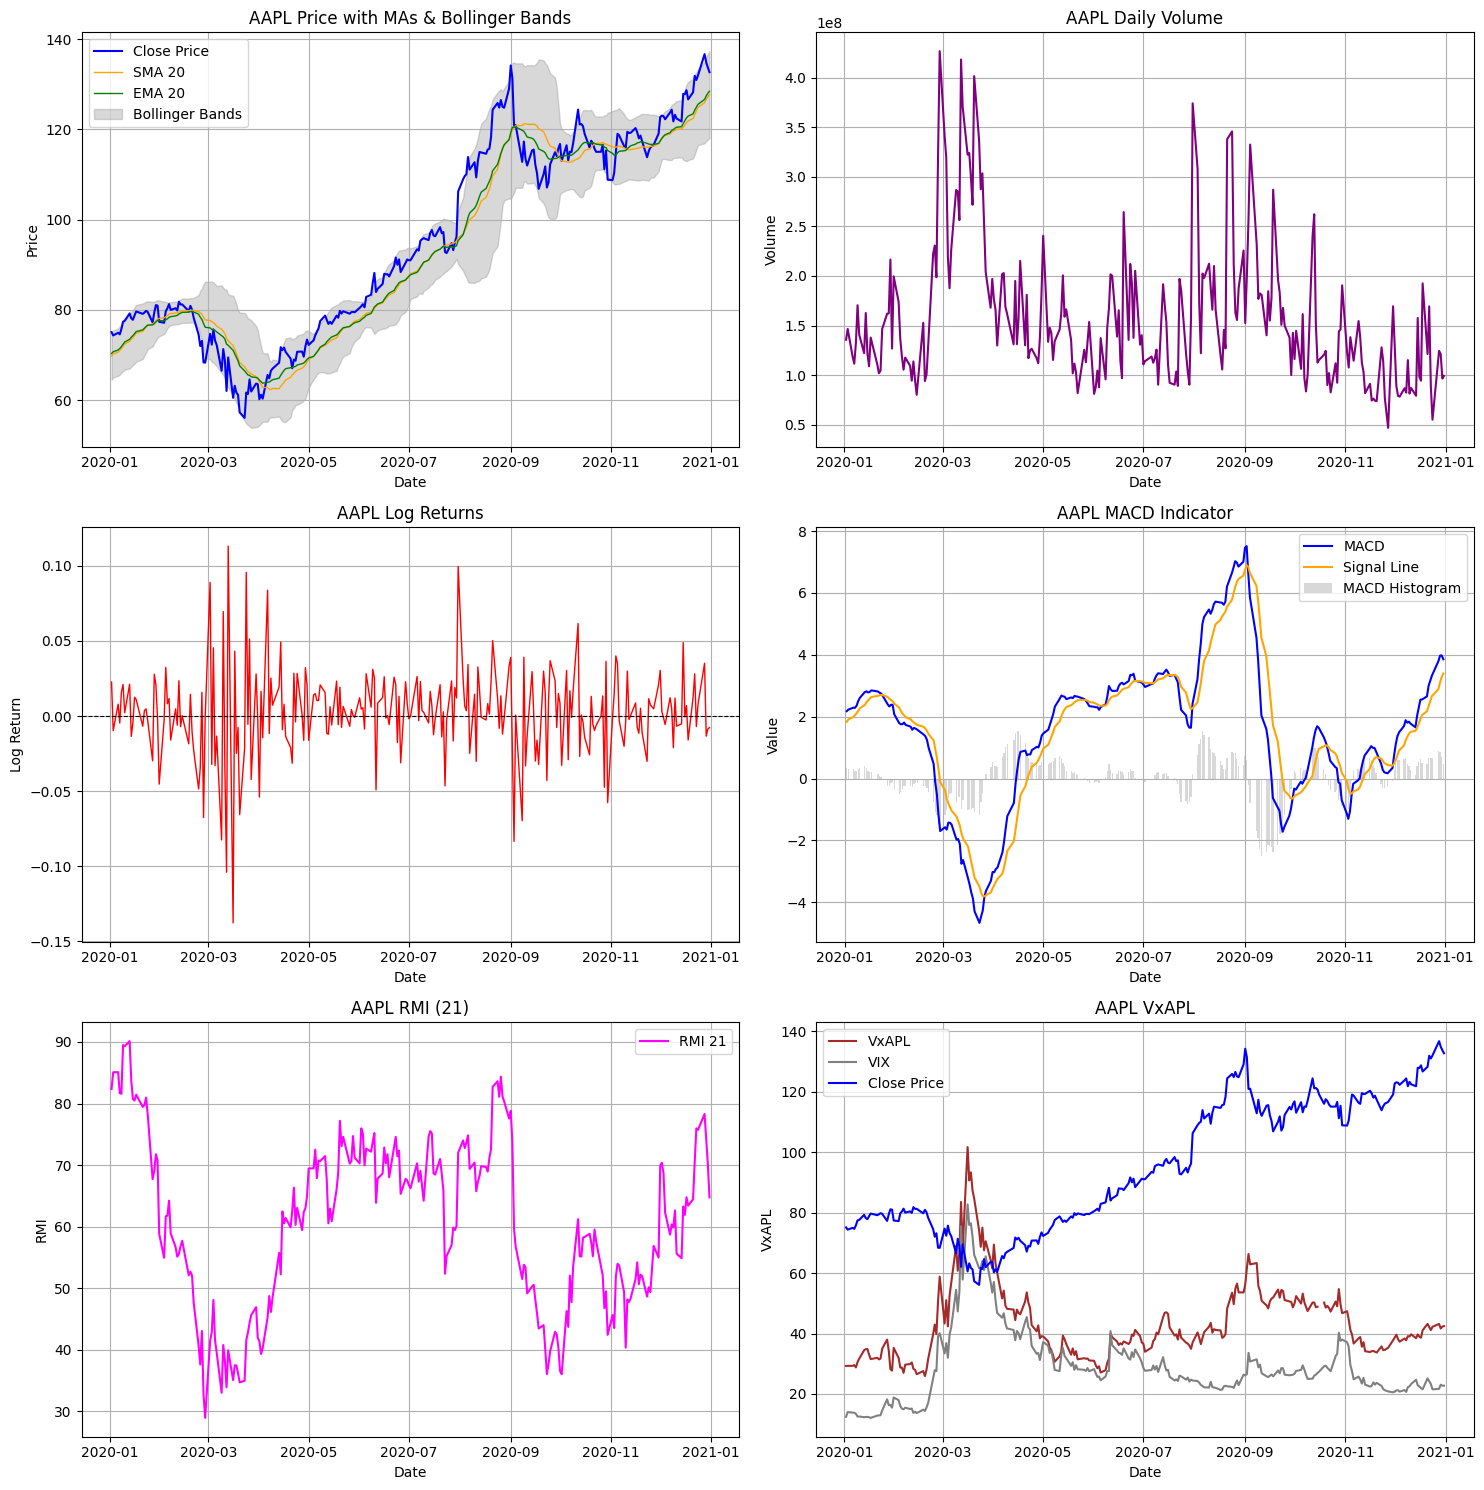

In [10]:
import matplotlib.pyplot as plt


# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Close Price with SMA, EMA, and Bollinger Bands
ax = axes[0, 0]
ax.plot(aapl_date, aapl_close, label='Close Price', color='blue', linewidth=1.5)
ax.plot(aapl_date, aapl_sma_20, label='SMA 20', color='orange', linewidth=1)
ax.plot(aapl_date, aapl_ema_20, label='EMA 20', color='green', linewidth=1)
ax.fill_between(aapl_date, aapl_bb_lower_20, aapl_bb_upper_20, color='grey', alpha=0.3, label='Bollinger Bands')
ax.set_title("AAPL Price with MAs & Bollinger Bands")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)

# Plot 2: Daily Volume
ax = axes[0, 1]
ax.plot(aapl_date, aapl_volume, color='purple')
ax.set_title("AAPL Daily Volume")
ax.set_xlabel("Date")
ax.set_ylabel("Volume")
ax.grid(True)

# Plot 3: Log Returns
ax = axes[1, 0]
ax.plot(aapl_date, aapl_log_returns, color='red', linewidth=1)
ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax.set_title("AAPL Log Returns")
ax.set_xlabel("Date")
ax.set_ylabel("Log Return")
ax.grid(True)

# Plot 4: MACD and Signal Line
ax = axes[1, 1]
ax.plot(aapl_date, aapl_macd, label='MACD', color='blue', linewidth=1.5)
ax.plot(aapl_date, aapl_signal_line, label='Signal Line', color='orange', linewidth=1.5)
ax.bar(aapl_date, aapl_macd_histogram, label='MACD Histogram', color='grey', alpha=0.3)
ax.set_title("AAPL MACD Indicator")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()
ax.grid(True)

# Plot 5: RMI (Relative Momentum Index)
ax = axes[2, 0]
ax.plot(aapl_date, aapl_rmi_21, label='RMI 21', color='magenta', linewidth=1.5)
ax.set_title("AAPL RMI (21)")
ax.set_xlabel("Date")
ax.set_ylabel("RMI")
ax.legend()
ax.grid(True)

# Plot 6: VxAPL (Volatility Indicator)
ax = axes[2, 1]
ax.plot(aapl_date, aapl_vxapl, label='VxAPL', color='brown', linewidth=1.5)
ax.plot(aapl_date, aapl_vix, label='VIX', color='grey', linewidth=1.5)
ax.plot(aapl_date, aapl_close, label='Close Price', color='blue', linewidth=1.5)
ax.set_title("AAPL VxAPL")
ax.set_xlabel("Date")
ax.set_ylabel("VxAPL")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [11]:
volatility_history = pl.read_csv("data/raw/options/csv/volatility_history.csv")

# Adjust date column format
volatility_history = volatility_history.with_columns(
    pl.col("date").str.to_date("%Y-%m-%d")
)

# Filter to only include AAPL from 2020
volatility_history = volatility_history.filter(pl.col("act_symbol") == "AAPL").filter(pl.col("date") >= pl.date(2020, 1, 1)).filter(pl.col("date") < pl.date(2021, 1, 1))

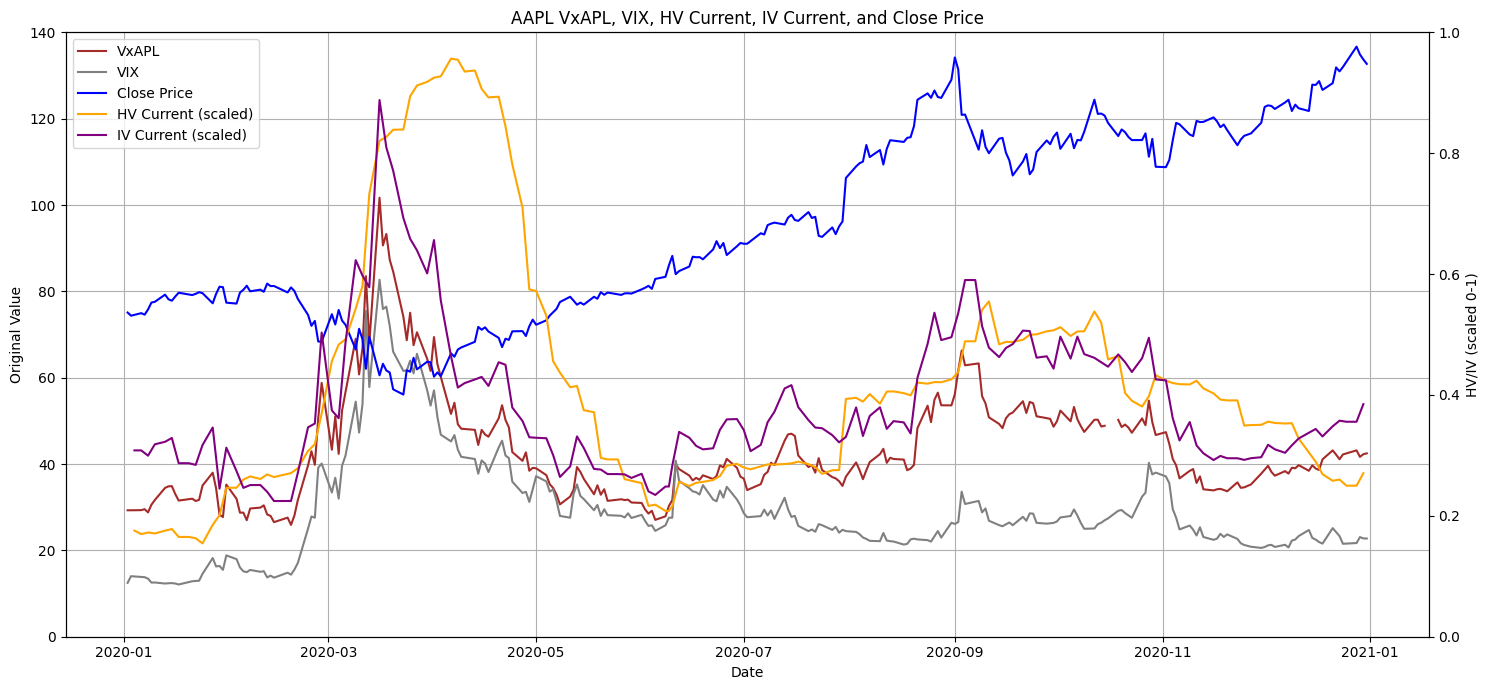

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the primary data
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(aapl_date, aapl_vxapl, label='VxAPL', color='brown', linewidth=1.5)
ax.plot(aapl_date, aapl_vix, label='VIX', color='grey', linewidth=1.5)
ax.plot(aapl_date, aapl_close, label='Close Price', color='blue', linewidth=1.5)
ax.set_ylim(0, 140)

# Create a secondary y-axis for the scaled HV and IV data
ax2 = ax.twinx()

# Extract hv_current and iv_current
hv = np.array(volatility_history['hv_current'].to_list())
iv = np.array(volatility_history['iv_current'].to_list())

# Get the corresponding dates for volatility_history
vol_dates = volatility_history['date'].to_list()

# Plot the scaled HV and IV on the secondary axis
ax2.plot(vol_dates, hv, label='HV Current (scaled)', color='orange', linewidth=1.5)
ax2.plot(vol_dates, iv, label='IV Current (scaled)', color='purple', linewidth=1.5)
ax2.set_ylim(0, 1)
ax2.set_ylabel("HV/IV (scaled 0-1)")

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

ax.set_title("AAPL VxAPL, VIX, HV Current, IV Current, and Close Price")
ax.set_xlabel("Date")
ax.set_ylabel("Original Value")
ax.grid(True)
plt.tight_layout()
plt.show()
